# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle
import numpy as np
# TODO: Fill this in based on where you saved the training and testing data

training_file = 'train.p'
testing_file = 'test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']




---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [2]:
### Replace each question mark with the appropriate value.

# TODO: Number of training examples
n_train =  len(X_train)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape =X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
alltotal = set(y_train )
n_classes = len(alltotal )

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

25


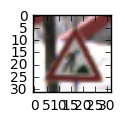

In [3]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import random
import numpy as np
# Visualizations will be shown in the notebook.
%matplotlib inline

index = random.randint(0, len(X_train))
image = X_train[index].squeeze()


plt.figure(figsize=(1,1))
plt.imshow(image)
print(y_train[index])

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.]


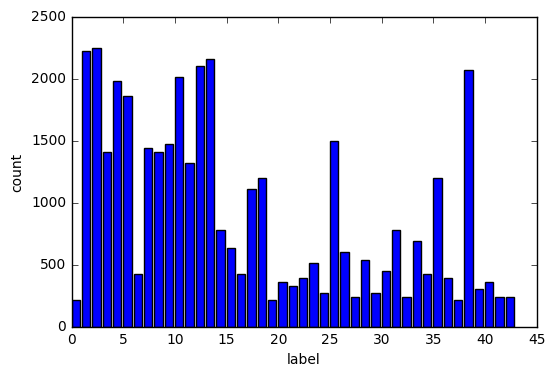

In [4]:
#绘制每个标志的计数等。
y= np.zeros(n_classes)
print(y)
for lab in y_train:
    y[lab]+=1
       

x =np.arange(n_classes)       
#print(y)
#绘制图像
fig = plt.figure()
ax = plt.gca()
ax.set_xlabel('label')
ax.set_ylabel('count')
plt.bar(x, y)
plt.show()

[0, 210, 2430, 4680, 6090, 8070, 9930, 10350, 11790, 13200, 14670, 16680, 18000, 20100, 22260, 23040, 23670, 24090, 25200, 26400, 26610, 26970, 27300, 27690, 28200, 28470, 29970, 30570, 30810, 31350, 31620, 32070, 32850, 33090, 33779, 34199, 35399, 35789, 35999, 38069, 38369, 38729, 38969]


C:\Program Files\Anaconda3\envs\carnd-term1\lib\site-packages\matplotlib\pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


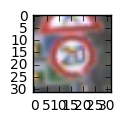

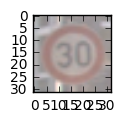

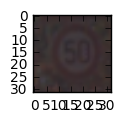

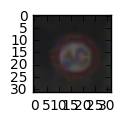

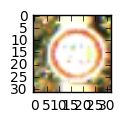

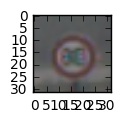

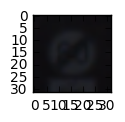

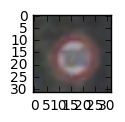

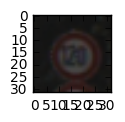

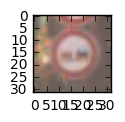

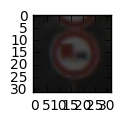

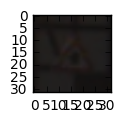

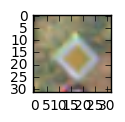

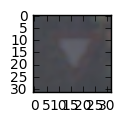

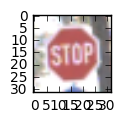

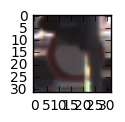

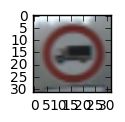

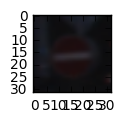

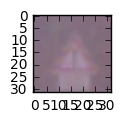

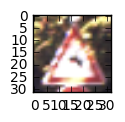

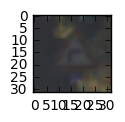

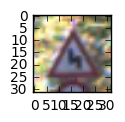

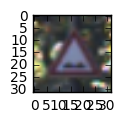

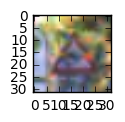

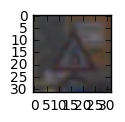

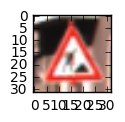

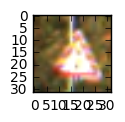

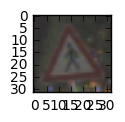

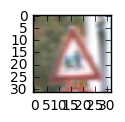

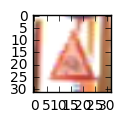

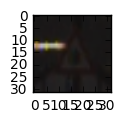

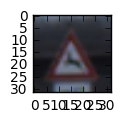

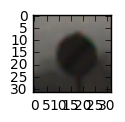

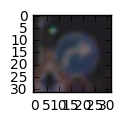

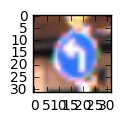

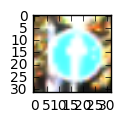

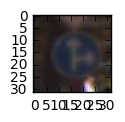

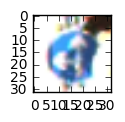

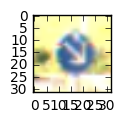

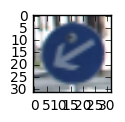

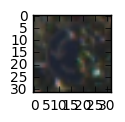

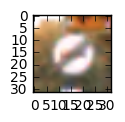

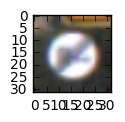

In [5]:
#绘制交通标志图像
def plantImg(img):
    plt.figure(figsize=(1,1))
    plt.imshow(img)


dicts={}
indexs=[]
for index,lab in enumerate(y_train):
    if lab in dicts:
        pass
    else:
        dicts[lab]=1
        indexs.append(index)

print(indexs)
for index in indexs:
    plantImg(X_train[index])


----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [6]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.
def grayscale(img):
    """Applies the Grayscale transform
    This will return an image with only one color channel
    but NOTE: to see the returned image as grayscale
    you should call plt.imshow(gray, cmap='gray')"""
    shape = img.shape    
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = img.reshape((shape[0],shape[1],1))
    return img

def applyCLAHE(img):
    """
    Apply local contrast maximization to a single channel uint8 image
    """
    clahe = cv2.createCLAHE(clipLimit=4.0, tileGridSize=(4,4))
    img_clahe = clahe.apply(img)
    return img_clahe

def normalize_grayscale(img):
    """
    Normalize the image data with Min-Max scaling to a range of [0.1, 0.9]
    :param image_data: The image data to be normalized
    :return: Normalized image data
    """
    # ToDo: Implement Min-Max scaling for greyscale image data
    a = 0.1;b = 0.9; Xmin = 0.0;Xmax = 255.0;
    X = img;
    Xp = a + (X-Xmin)*(b-a)/(Xmax-Xmin)
    return Xp

# this function will be used to preprocess all images
def preprocess_images(images):    
    shape = images.shape 
    out_img_shape=(shape[1],shape[2],1)
    batch = np.zeros((shape[0],shape[1],shape[2],1))
    
    for i in range(len(images)):        
        img = images[i,:]        
        img = grayscale(img)        
        img = applyCLAHE(img).reshape(out_img_shape)
        img = normalize_grayscale(img)        
        batch[i] = img
    return batch



In [7]:
print(X_train[0])

[[[ 75  78  80]
  [ 74  76  78]
  [ 83  84  83]
  ..., 
  [ 67  74  73]
  [ 65  69  68]
  [ 66  67  66]]

 [[ 82  83  85]
  [ 80  80  82]
  [ 87  86  83]
  ..., 
  [ 73  77  77]
  [ 75  77  75]
  [ 79  79  77]]

 [[ 79  79  81]
  [ 84  83  85]
  [ 91  88  89]
  ..., 
  [ 72  74  72]
  [ 74  75  71]
  [ 78  78  74]]

 ..., 
 [[126 128 133]
  [118 123 128]
  [108 117 120]
  ..., 
  [ 96  96  90]
  [ 99 101  94]
  [ 99 103  99]]

 [[ 90  94  98]
  [ 91  97 103]
  [ 77  87  92]
  ..., 
  [104 104  97]
  [107 111 102]
  [ 95 103  97]]

 [[ 85  84  87]
  [ 93  99 104]
  [ 69  80  85]
  ..., 
  [101 102  94]
  [ 98 101  90]
  [ 90  97  89]]]


In [8]:

from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train)

### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:**
Use the random scrambling tool sklearn.utils.shuffle to scramble the original sequence and return a completely new sequence of values
The role of shuffle is to specify whether random shuffling of the order of the sample, the general role in the training phase to improve the robustness.

In [9]:
### Generate data additional data (OPTIONAL!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.
from sklearn.model_selection import train_test_split

X_train,X_validation,y_train,y_validation = train_test_split(X_train,y_train,test_size=0.2,random_state=0)


print("image shpae is {}".format(X_train[0].shape))



image shpae is (32, 32, 3)


### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**

The data is divided into training set and validation set, which is generated by train_test_split function of sklearn, where the training set is 80% and the verification set is 20%.
Validation data is usually used directly in the construction process of the model, especially in the iterative algorithm, such as multi-layer neural network algorithm, the algorithm in each iteration process, will update the network connection layer weight, After completing a round of updates, the algorithm uses validation data to validate the algorithm to improve the performance of the algorithm.

The main difference between testing data and testing data is the parameters used to validate the data used to adjust the model and the conditions used to set the early stop

In [10]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
import tensorflow as tf
from tensorflow.contrib.layers import flatten

def LeNet(x):    
    # Hyperparameters
    mu = 0
    sigma = 0.1
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)

    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)

    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 10.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**

 Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.

 Activation.

  Pooling. Input = 28x28x6. Output = 14x14x6.

  Layer 2: Convolutional. Output = 10x10x16.
    
  Activation.

  Pooling. Input = 10x10x16. Output = 5x5x16.

  Flatten. Input = 5x5x16. Output = 400.
    
  Layer 3: Fully Connected. Input = 400. Output = 120.
    
  Activation.

  Layer 4: Fully Connected. Input = 120. Output = 84.
    
  Activation.

  Layer 5: Fully Connected. Input = 84. Output = 10.

In [11]:
### Train your model here.
### Feel free to use as many code cells as needed.
#x is a placeholder for a batch of input images. y is a placeholder for a batch of output labels.
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)



In [12]:

#Create a training pipeline that uses the model to classify data.
rate = 0.001
EPOCHS=20
BATCH_SIZE=128
save_file = './model.ckpt'

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)
test_prediction = tf.argmax(logits, 1)
test_softmax = tf.nn.softmax(logits)

In [13]:
#Evaluate how well the loss and accuracy of the model for a given dataset.
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

In [14]:
def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples



In [15]:
#Run the training data through the training pipeline to train the model.
#Before each epoch, shuffle the training set.
#After each epoch, measure the loss and accuracy of the validation set.
#Save the model after training.
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        validation_accuracy = evaluate(X_validation, y_validation)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, save_file)
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.578

EPOCH 2 ...
Validation Accuracy = 0.748

EPOCH 3 ...
Validation Accuracy = 0.836

EPOCH 4 ...
Validation Accuracy = 0.872

EPOCH 5 ...
Validation Accuracy = 0.901

EPOCH 6 ...
Validation Accuracy = 0.901

EPOCH 7 ...
Validation Accuracy = 0.925

EPOCH 8 ...
Validation Accuracy = 0.932

EPOCH 9 ...
Validation Accuracy = 0.946

EPOCH 10 ...
Validation Accuracy = 0.949

EPOCH 11 ...
Validation Accuracy = 0.944

EPOCH 12 ...
Validation Accuracy = 0.948

EPOCH 13 ...
Validation Accuracy = 0.948

EPOCH 14 ...
Validation Accuracy = 0.955

EPOCH 15 ...
Validation Accuracy = 0.963

EPOCH 16 ...
Validation Accuracy = 0.966

EPOCH 17 ...
Validation Accuracy = 0.964

EPOCH 18 ...
Validation Accuracy = 0.966

EPOCH 19 ...
Validation Accuracy = 0.963

EPOCH 20 ...
Validation Accuracy = 0.949

Model saved


In [16]:
with tf.Session() as sess:
    #saver = tf.train.import_meta_graph('model.ckpt.meta')
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, y_test)

    prediction=test_accuracy * len(X_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))
    


Test Accuracy = 0.858


### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**

1. Create a training pipeline that uses the model to classify data.<br>
2. Assess the loss and accuracy of the model for a given data set.<br>
3. the batch is 128 batches, the use of shuffle random disruption of training data<br>
4. the rate is set to 0.001<br>
5. EPOCHS = 20<br>
6. BATCH_SIZE = 128<br>

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**

I modeled the lenet-5 architecture, used convolutional neural networks to train models, used validation in training overshoots to verify the accuracy of training results, used one-hot coding in training, and cross entropy as loss function.

Training...

EPOCH 1 ...
Validation Accuracy = 0.549

EPOCH 2 ...
Validation Accuracy = 0.774

EPOCH 3 ...
Validation Accuracy = 0.849

EPOCH 4 ...
Validation Accuracy = 0.873

EPOCH 5 ...
Validation Accuracy = 0.895

EPOCH 6 ...
Validation Accuracy = 0.912

EPOCH 7 ...
Validation Accuracy = 0.913

EPOCH 8 ...
Validation Accuracy = 0.925

EPOCH 9 ...
Validation Accuracy = 0.932

EPOCH 10 ...
Validation Accuracy = 0.939

EPOCH 11 ...
Validation Accuracy = 0.935

EPOCH 12 ...
Validation Accuracy = 0.935

EPOCH 13 ...
Validation Accuracy = 0.942

EPOCH 14 ...
Validation Accuracy = 0.938

EPOCH 15 ...
Validation Accuracy = 0.942

EPOCH 16 ...
Validation Accuracy = 0.948

EPOCH 17 ...
Validation Accuracy = 0.947

EPOCH 18 ...
Validation Accuracy = 0.948

EPOCH 19 ...
Validation Accuracy = 0.918

EPOCH 20 ...
Validation Accuracy = 0.940


<br>

Batch choice, the first decision is the direction of decline. If the data set is small, it can be in the form of Full Batch Learning, which has at least two benefits: first, the direction determined by the full data set can better represent the population of samples, and thus more accurately Towards the direction of extreme values. Second, because the gradient of the different weights vary widely, it is difficult to choose a global learning rate.
For larger data sets, these two benefits have become two disadvantages: First, with the massive growth of data sets and memory constraints, a one-time load all the data come in more and more not feasible. Second, due to the sampling differences between the various Batch, each gradient correction value offset each other, can not be amended.

What is the benefit of increasing batch_size?
The memory utilization rate is improved, and the efficiency of parallel operation of large matrix multiplication is improved
The number of iterations required to finish an epoch is reduced, and the processing speed for the same number is further accelerated
In a certain range, in general, the greater the batch_size, the more difficult to determine the direction of decline, causing less training shock.

Blind increase batch_size bad?
Memory utilization increased, but the memory capacity may not hold.
The number of iterations required to finish an epoch is reduced, and the time it takes to achieve the same accuracy increases significantly. So the correction of the parameters will appear more slowly.
Batch_size increased to a certain extent, its determination of the direction of decline is basically no longer change.

So, I try to use batch_size as 128, view accuray precision to continuously adjust batch_size,


================================================

The epoch is a single forward and backward transfer of the entire data set. This is used to improve the accuracy of the model without the need for more data.
I tried to set an epoch count that approximated infinity, and then snapshot some intermediate results to find the best-performing model.
Find the most reasonable epoch value.
================================================
Yes, lenet network is a classic neural network, according to the previous study to learn other networks, lenet network is more suitable for this problem.

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [17]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

test_imgs=[
'images/1.png',
'images/2.png',
'images/3.png',
'images/4.png',
'images/5.png'
]
test_labels=[
38,
39,
33,
35,
9
]




In [18]:
from PIL import Image

for path in test_imgs:
    img = Image.open(path)
    img = img.convert('RGB')
    img = img.resize((32,32))
    img.save(path,'png')



In [19]:
import matplotlib.image as mpimg # mpimg 
import numpy as np

test_imgsaa=np.zeros((len(test_imgs),32,32,3))
index=0
for path in test_imgs:
    img = mpimg.imread(path) # 
    test_imgsaa[index] =img
    index+=1

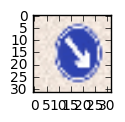

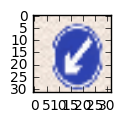

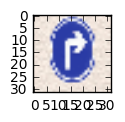

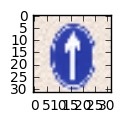

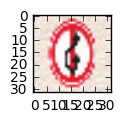

In [20]:
for img in test_imgsaa:
    imgs = img.squeeze()
    plantImg(imgs)

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**

I use Baidu search on the Internet to find the 5 signs of China, to judge, the image does not specifically refer to the quality of the normal classification can be used.<br>
The difficulty of processing is to convert the picture into 32 * 32 * 3 format images<br>
<a href=Http://www.360doc.com/content/13/0317/15/52920_272052285.shtml>Http://www.360doc.com/content/13/0317/15/52920_272052285.shtml<a>

In [21]:
### Run the predictions here.
### Feel free to use as many code cells as needed.

predic_imgs=None
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    predic_imgs= sess.run(test_prediction , feed_dict={
        x: test_imgsaa })


print(" images:", predic_imgs)





 images: [10 10 10  3 10]


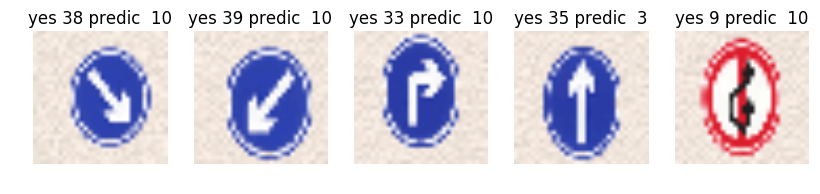

In [22]:
###绘制预测的图片    
fig = plt.figure()
fig.set_size_inches(10, 2.5)
for i, imgs in enumerate(test_imgsaa):
    subplot = '1' + str(len(test_imgsaa)) + str(i + 1)
    ax = fig.add_subplot(subplot)
    ax.imshow(imgs)
    #ax.set_title(predic_imgs[i])
    ax.set_title('yes '+str(test_labels[i])+' predic  '+str(predic_imgs[i]))
    plt.axis('off')

In [23]:
###验证测试集

prediction = tf.placeholder(tf.float32, (None, 43))
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    accuracy_test = evaluate(X_test, y_test )
    prediction=accuracy_test * len(X_test)
    print("Test Accuracy = {:.3f}".format(accuracy_test ))



Test Accuracy = 0.858


In [24]:
prediction = tf.nn.softmax(logits)
test_imgsaa = np.asarray(test_imgsaa)
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    new_prediction= sess.run(prediction, feed_dict={x: test_imgsaa})


print(new_prediction)

[[ 0.0045416   0.01356976  0.02093744  0.06289245  0.02325185  0.06437736
   0.02544429  0.03284259  0.0516404   0.02758603  0.07134952  0.01636278
   0.02201095  0.01964663  0.01713989  0.0198983   0.01579583  0.01081185
   0.0196941   0.01245478  0.04014536  0.01224707  0.00604826  0.01797687
   0.00645989  0.02021783  0.02147818  0.00545153  0.01340603  0.02331239
   0.01818138  0.03509571  0.02189239  0.01992821  0.02789729  0.02493874
   0.02503697  0.01177501  0.03915515  0.00641439  0.01734635  0.01113488
   0.02221166]
 [ 0.00529576  0.01250065  0.01858393  0.04956818  0.02983067  0.06154048
   0.01455517  0.02488269  0.0465756   0.04085745  0.08280384  0.01089484
   0.03851596  0.03385238  0.01249363  0.02428046  0.01472187  0.01103806
   0.02340002  0.01052979  0.03705143  0.00945399  0.0057182   0.01361477
   0.00705769  0.02391414  0.02732052  0.00407549  0.00953992  0.01222143
   0.01325286  0.02196795  0.01421041  0.03434429  0.02213233  0.04108741
   0.02635111  0.021022

In [25]:
max_value = np.argmax(new_prediction[0])
print(max_value)  

max_value = np.argmax(new_prediction[1])
print(max_value) 

max_value = np.argmax(new_prediction[2])
print(max_value)  

max_value = np.argmax(new_prediction[3])
print(max_value) 

max_value = np.argmax(new_prediction[4])
print(max_value)  

10
10
10
3
10


### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**

Based on the above results, my model is 40% accurate.

In [26]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.


softmax_top_k = None
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    new_images_softmax = sess.run(test_softmax, feed_dict={
        x: test_imgsaa})
    softmax_top_k = sess.run(tf.nn.top_k(tf.constant(new_images_softmax), k=5))


print (softmax_top_k)
print (softmax_top_k.values)
print (softmax_top_k.indices)




TopKV2(values=array([[ 0.07134952,  0.06437736,  0.06289245,  0.0516404 ,  0.04014536],
       [ 0.08280384,  0.06154048,  0.04956818,  0.0465756 ,  0.04108741],
       [ 0.05788922,  0.0522831 ,  0.04754553,  0.04483222,  0.04400016],
       [ 0.06490136,  0.0550531 ,  0.05499161,  0.05199229,  0.04184555],
       [ 0.07504226,  0.07016809,  0.05956072,  0.05247305,  0.04790802]], dtype=float32), indices=array([[10,  5,  3,  8, 20],
       [10,  5,  3,  8, 35],
       [10,  8,  5,  3, 26],
       [ 3,  5,  8, 10, 35],
       [10,  8,  5,  7,  3]]))
[[ 0.07134952  0.06437736  0.06289245  0.0516404   0.04014536]
 [ 0.08280384  0.06154048  0.04956818  0.0465756   0.04108741]
 [ 0.05788922  0.0522831   0.04754553  0.04483222  0.04400016]
 [ 0.06490136  0.0550531   0.05499161  0.05199229  0.04184555]
 [ 0.07504226  0.07016809  0.05956072  0.05247305  0.04790802]]
[[10  5  3  8 20]
 [10  5  3  8 35]
 [10  8  5  3 26]
 [ 3  5  8 10 35]
 [10  8  5  7  3]]


### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:**

The prediction accuracy on the five test images is 0%.<br>
The probability of the first prediction is [0.07134952, 0.06437736, 0.06289245, 0.0516404, 0.04014536] respectively,<br>
Corresponding to 10, 5, 3, 8, 20, respectively, and the actual value is 38. The correct prediction does not appear in the first five.<br>
Likewise, the second prediction of the first five inside, [10, 5, 3, 8, 35], while the actual value is 39, the correct prediction does not appear in the first five inside.<br>
The third prediction of the first five inside [10, 8, 5, 3, 26], the actual value of 33 correct predictions did not appear in the first five inside.<br>
The first five of the fourth predictions [3, 5, 8, 10, 35], the actual value is 35 The correct prediction appears in the top five, but at the end.<br>
The first five of the five predictions [10, 8, 5, 7, 3], the actual value is 9, the correct prediction does not appear in the first five inside.<br>
Only the fourth has the predicted results in the first five, but the probability is too low.<br>
<br>
I think this is mainly caused by the quality of the picture,


> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.